# Airbnb - Rio: Desvendando os Preços - Ferramenta de Previsão 

### Explorando os Aluguéis do Rio de Janeiro

Imagine-se como um anfitrião no Airbnb, pronto para listar seu espaço para aluguel. O processo começa com a criação de um perfil e um anúncio detalhado do seu imóvel. Este anúncio é crucial, pois contém uma infinidade de informações, desde o preço até as comodidades oferecidas.

### Objetivo: Desvendar o Mistério dos Preços

Nosso objetivo é criar um modelo que prevê os preços dos aluguéis de imóveis no Rio de Janeiro. Este modelo não só ajuda os anfitriões a estabelecerem preços justos para seus espaços, mas também auxilia os potenciais locatários a determinarem se um aluguel em particular está com preço atrativo.

### Fonte de Inspiração e Dados Disponíveis

Recorremos ao Kaggle para obter dados sobre os preços dos aluguéis no Airbnb no Rio de Janeiro. Esses conjuntos de dados contêm informações detalhadas sobre os imóveis e seus preços, permitindo-nos explorar padrões e tendências.

https://www.kaggle.com/datasets/allanbruno/airbnb-rio-de-janeiro

### Preparando o ambiente

In [126]:
import pandas as pd
import numpy as np

import pathlib
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Carregando a base

In [2]:
meses = {'jan': 1, 'fev':2, 'mar':3, 'abr': 4, 'mai':5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

caminho_bases = pathlib.Path('datasets')

base_airbnb = []

for arquivo in caminho_bases.iterdir():
    print(f'Carregando: {arquivo.name}')

    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]
    ano = int(arquivo.name[-8:].replace('.csv', ''))
    
    df = pd.read_csv(caminho_bases / arquivo.name, low_memory=False)
    df['ano'] = ano
    df['mes'] = mes
    base_airbnb.append(df)


base_airbnb = pd.concat(base_airbnb, ignore_index=True)

print('arquivos carregados com sucesso')
display(base_airbnb.head())

Carregando: abril2018.csv
Carregando: abril2019.csv
Carregando: abril2020.csv
Carregando: agosto2018.csv
Carregando: agosto2019.csv
Carregando: dezembro2018.csv
Carregando: dezembro2019.csv
Carregando: fevereiro2019.csv
Carregando: fevereiro2020.csv
Carregando: janeiro2019.csv
Carregando: janeiro2020.csv
Carregando: julho2018.csv
Carregando: julho2019.csv
Carregando: junho2019.csv
Carregando: maio2018.csv
arquivos carregados com sucesso


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,ano,mes,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,Best and favorite neighborhood of Rio. Perfect...,NaN,Everything is there. METRO is 5 min walk. Dir...,NaN,NaN,strictly no smoking in the apartment ! We want...,NaN,NaN,https://a0.muscache.com/im/pictures/66421/ae9b...,NaN,53598,https://www.airbnb.com/users/show/53598,Shalev,2009-11-12,FL,"Hello , my name is Shalev , I am an orchestra ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/53598/profile...,https://a0.muscache.com/im/users/53598/profile...,Botafogo,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"Rio de Janeiro, RJ, Brazil",Botafogo,Botafogo,NaN,Rio de Janeiro,RJ,22250-040,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.946854,-43.182737,t,Apartment,Entire home/apt,4,1.0,0.0,2.0,Real Bed,"{TV,Internet,""Air conditioning"",Kitchen,Doorma...",NaN,$133.00,$823.00,"$2,698.00","$1,025.00",$102.00,2,$34.00,60,365,7 weeks ago,t,28,58,88,363,2018-04-14,38,2010-01-03,2018-03-04,91.0,9.0,9.0,9.0,9.0,9.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.38,2018,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It is a vacatio...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Rio de Janeiro, Brazil",I used to work as a journalist all around the ...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/67b13cea-8...,https://a0.muscache.com/im/pictures/67b13cea-8...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews']",t,f,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,NaN,Rio de Janeiro,Rio de Janeiro,22020-050

1. Algumas colunas não são úteis para prever, então vamos removê-las:
    - IDs, links e informações irrelevantes
    - Colunas repetidas ou muito similares
    - Colunas onde todos ou quase todos os valores são iguais.

In [3]:
list(base_airbnb.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


- Após analisarmos as colunas, levando em consideração os critérios previamente estabelecidos, selecionamos as seguintes colunas como relevantes para nossa análise:

In [4]:
colunas = ['host_is_superhost','host_listings_count','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','latitude','longitude','price','security_deposit','cleaning_fee','extra_people','minimum_nights','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']

base_airbnb = base_airbnb.loc[:, colunas]
print(list(base_airbnb.columns))
display(base_airbnb.head())

['host_is_superhost', 'host_listings_count', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'latitude', 'longitude', 'price', 'security_deposit', 'cleaning_fee', 'extra_people', 'minimum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'ano', 'mes']


,host_is_superhost,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,latitude,longitude,price,security_deposit,cleaning_fee,extra_people,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,f,1.0,Apartment,Entire home/apt,4,1.0,0.0,2.0,Real Bed,"{TV,Internet,""Air conditioning"",Kitchen,Doorma...",-22.946854,-43.182737,$133.00,"$1,025.00",$102.00,$34.00,60,91.0,9.0,9.0,9.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,2018,4
1,t,2.0,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",-22.965919,-43.178962,$270.00,$0.00,$273.00,$51.00,4,93.0,10.0,9.0,10.0,10.0,9.0,9.0,t,f,strict,2018,4
2,f,1.0,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",""First ...",-22.985698,-43.201935,$222.00,$851.00,$211.00,$215.00,3,95.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
3,f,3.0,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",-22.977117,-43.190454,$161.00,"$1,000.00",$220.00,$45.00,4,94.0,9.0,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
4,t,1.0,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",-22.983024,-43.214270,$222.00,NaN,$85.00,$68.00,2,96.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f,strict,2018,4


### Tratando valores vazios

Após uma inspeção dos dados, notamos uma disparidade significativa na presença de valores faltantes.
Vamos excluir da análise as colunas que possuem mais de 300.000 valores NaN. Para as demais colunas, devido à grande quantidade de dados (mais de 900.000 linhas), optamos por remover as linhas que contenham valores NaN.

In [5]:
base_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547118 entries, 0 to 547117
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   host_is_superhost            546793 non-null  object 
 1   host_listings_count          546793 non-null  float64
 2   property_type                547118 non-null  object 
 3   room_type                    547118 non-null  object 
 4   accommodates                 547118 non-null  int64  
 5   bathrooms                    546073 non-null  float64
 6   bedrooms                     546625 non-null  float64
 7   beds                         545632 non-null  float64
 8   bed_type                     547118 non-null  object 
 9   amenities                    547118 non-null  object 
 10  latitude                     547118 non-null  float64
 11  longitude                    547118 non-null  float64
 12  price                        547118 non-null  object 
 13 

In [6]:
for coluna in base_airbnb:
    if base_airbnb[coluna].isnull().sum() > 300000:
        base_airbnb = base_airbnb.drop(coluna, axis=1)
print(base_airbnb.isnull().sum())

host_is_superhost                 325
host_listings_count               325
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        1045
bedrooms                          493
beds                             1486
bed_type                            0
amenities                           0
latitude                            0
longitude                           0
price                               0
security_deposit               257016
cleaning_fee                   190741
extra_people                        0
minimum_nights                      0
review_scores_rating           274077
review_scores_accuracy         274432
review_scores_cleanliness      274324
review_scores_checkin          274471
review_scores_communication    274329
review_scores_location         274415
review_scores_value            274417
instant_bookable                    0
is_business_travel_ready            0
cancellation

In [7]:
# Excluindo as linhas vazias
base_airbnb = base_airbnb.dropna()

print(base_airbnb.shape)
print(base_airbnb.isnull().sum())

(171182, 29)
host_is_superhost              0
host_listings_count            0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type                       0
amenities                      0
latitude                       0
longitude                      0
price                          0
security_deposit               0
cleaning_fee                   0
extra_people                   0
minimum_nights                 0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
ano                            0
mes                            0
dtype: int64


- Vamos verificar os tipos de dados em cada coluna, pois ocasionalmente o Python pode interpretar uma coluna como texto quando na verdade deveria ser numérica. Isso é importante para garantir a precisão dos nossos cálculos e análises.

In [8]:
print(base_airbnb.dtypes)

host_is_superhost               object
host_listings_count            float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
amenities                       object
latitude                       float64
longitude                      float64
price                           object
security_deposit                object
cleaning_fee                    object
extra_people                    object
minimum_nights                   int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
instant_bookable                object
is_business_travel_ready 

In [9]:
# Price
base_airbnb['price'] = base_airbnb['price'].str.replace('$', '').str.replace(',', '').astype(np.float32, copy=False)
# Extra people
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '').str.replace(',', '').astype(np.float32, copy=False)
# Security deposit
base_airbnb['security_deposit'] = base_airbnb['security_deposit'].str.replace('$', '').str.replace(',', '').astype(float)
# Cleaning fee
base_airbnb['cleaning_fee'] = base_airbnb['cleaning_fee'].str.replace('$', '').str.replace(',', '').astype(float)

print(base_airbnb.dtypes)

host_is_superhost               object
host_listings_count            float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
amenities                       object
latitude                       float64
longitude                      float64
price                          float32
security_deposit               float64
cleaning_fee                   float64
extra_people                   float32
minimum_nights                   int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
instant_bookable                object
is_business_travel_ready 

# Análise exploratória dos dados

<Axes: >

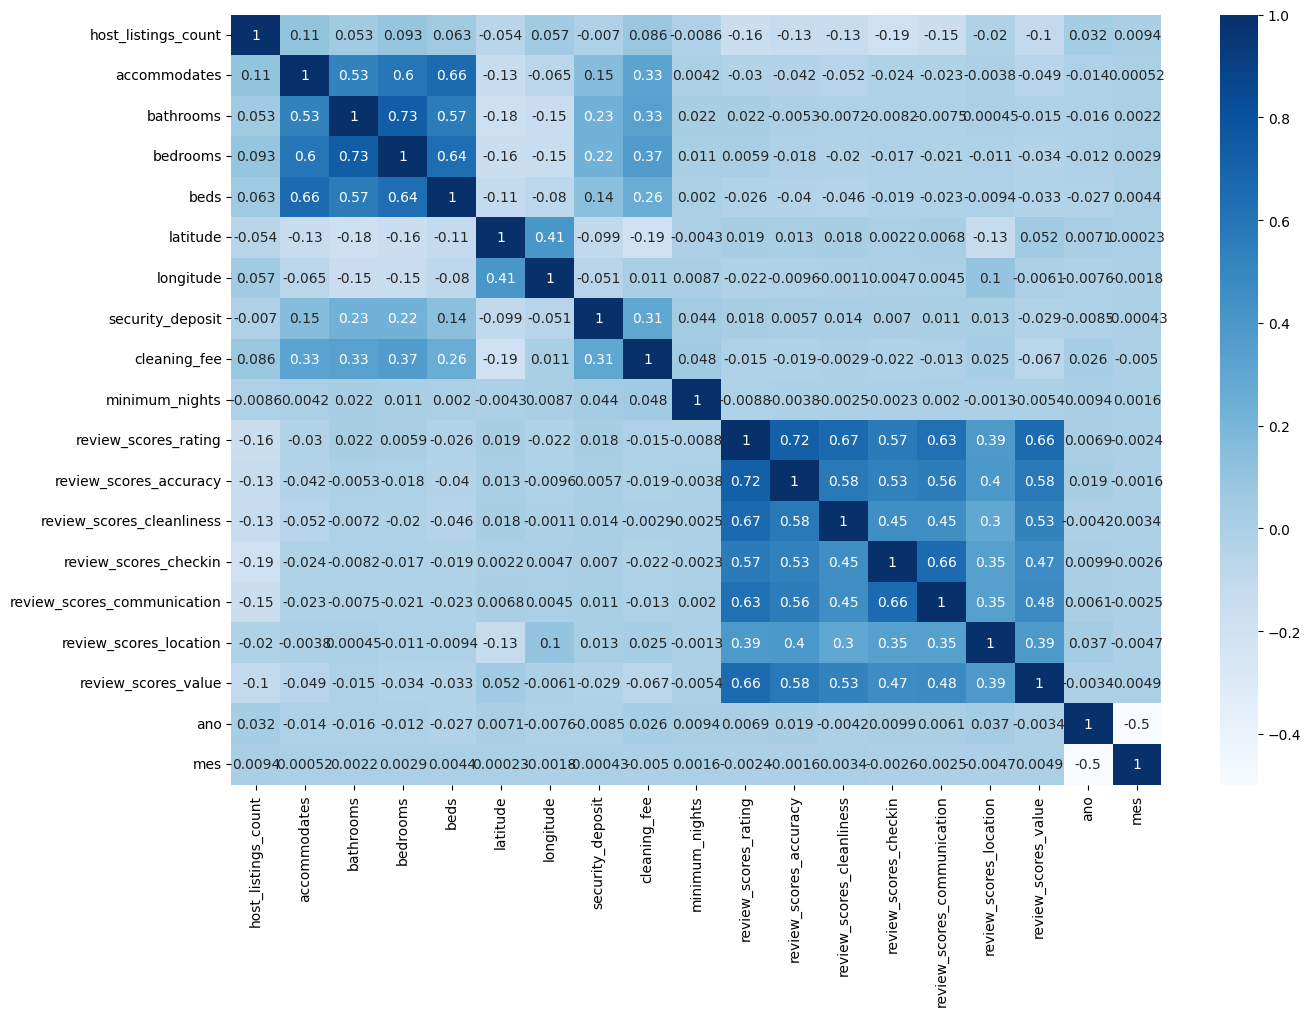

In [10]:
# Selecionar apenas as colunas do tipo float ou int
colunas_numericas = base_airbnb.select_dtypes(include=['float64', 'int64'])

# Calcular a correlação apenas para as colunas numéricas
correlation_matrix = colunas_numericas.corr()

# Plotando o gráfico
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')

### Funções auxiliares

In [11]:
def calcular_limites_outliers(coluna: pd.Series):
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    amplitude = Q3 - Q1
    limite_inferior = Q1 - 1.5 * amplitude
    limite_superior = Q3 + 1.5 * amplitude
    
    return (limite_inferior, limite_superior)

def excluir_outilers(df: pd.DataFrame, coluna: pd.Series):
    qtd_linhas = df.shape[0]
    lim_inf, lim_sup = calcular_limites_outliers(df[coluna])
    df = df.loc[(df[coluna] >= lim_inf) & (df[coluna] <= lim_sup), :]
    linhas_removidas = qtd_linhas - df.shape[0]
    return df, linhas_removidas

def box_plot(coluna: pd.Series):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(calcular_limites_outliers(coluna))
    sns.boxplot(x=coluna, ax=ax2)

def grafico_barra(coluna: pd.Series):
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(calcular_limites_outliers(coluna))

def hist_plot(coluna: pd.Series):
    plt.figure(figsize=(15, 5))
    sns.distplot(coluna, hist=True)

def violin_plot(coluna: pd.Series):
    plt.figure(figsize=(10, 5))
    sns.violinplot(coluna)
    plt.show()

### Análise de outilers

Como o intuito do modelo é prever o preço de imóveis que acreditamos ser mais acessíveis popularmente, iremos excluir os valores discrepantes que representam imóveis de alto padrão.

### price

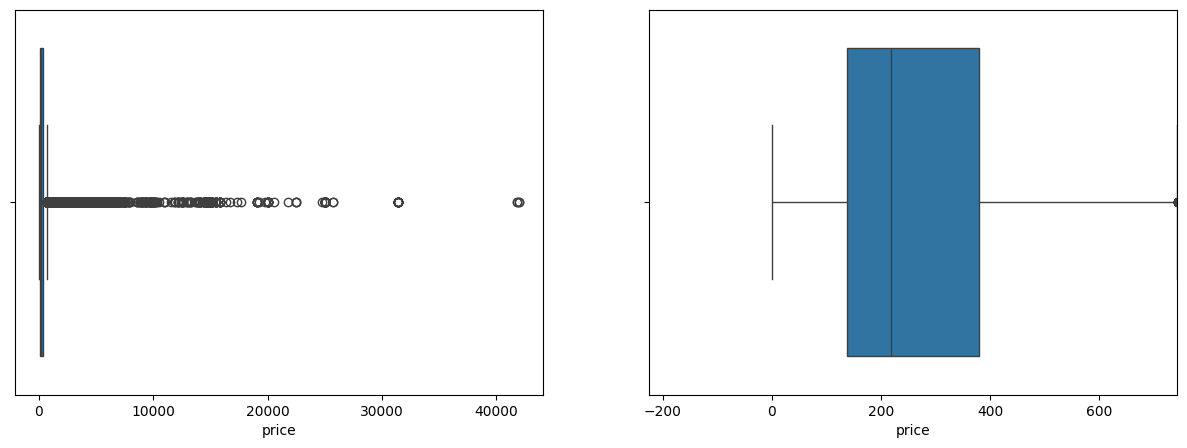

In [12]:
box_plot(base_airbnb['price'])

In [13]:
base_airbnb, linhas_removidas = excluir_outilers(base_airbnb, 'price')
print(f'{linhas_removidas} linhas foram removidas')

14746 linhas foram removidas


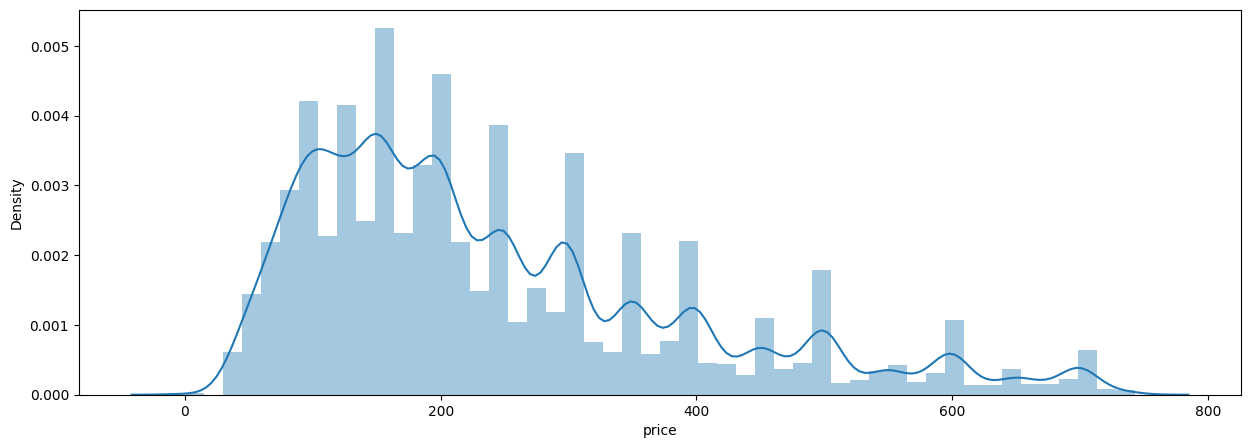

In [14]:
hist_plot(base_airbnb['price'])

### extra_people

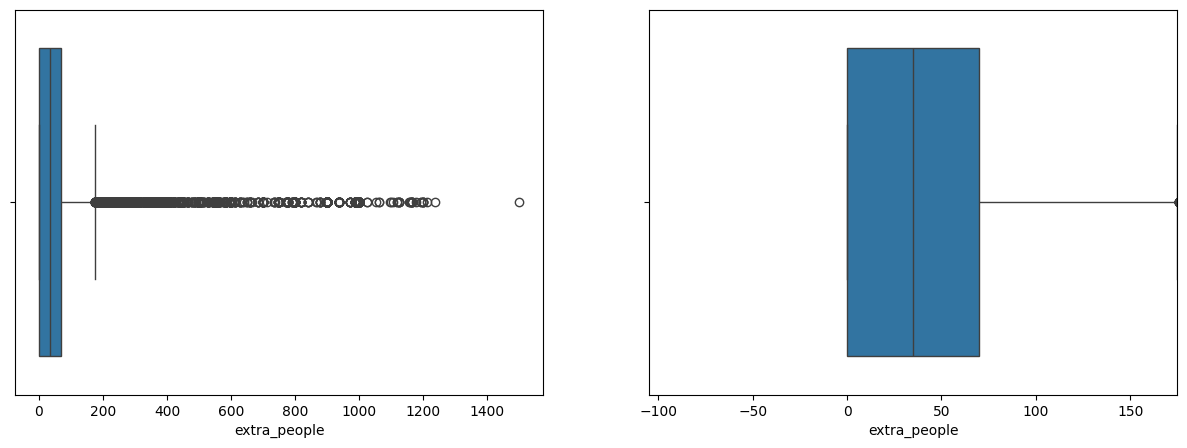

In [15]:
box_plot(base_airbnb['extra_people'])

In [16]:
base_airbnb, linhas_removidas = excluir_outilers(base_airbnb, 'extra_people')
print(f'{linhas_removidas} linhas foram removidas')

6219 linhas foram removidas


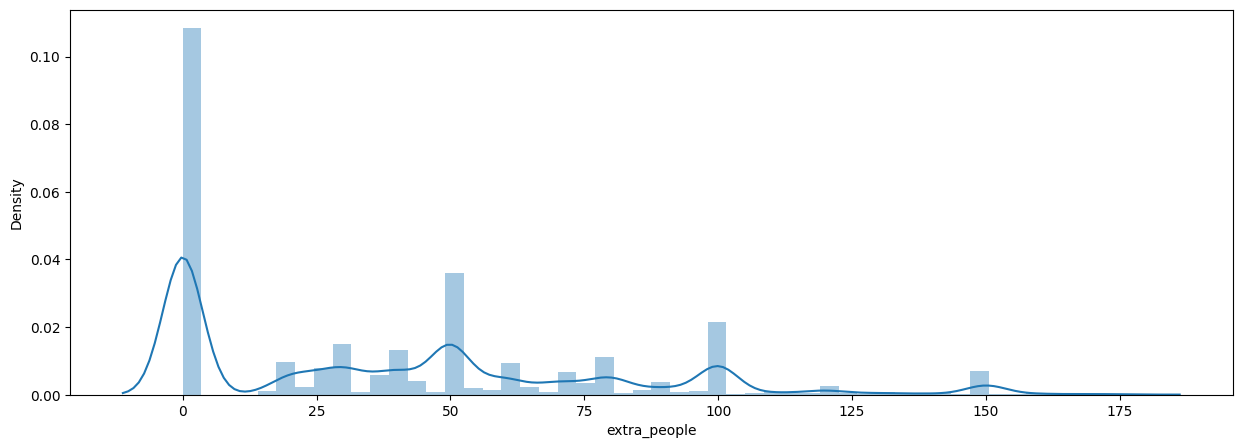

In [17]:
hist_plot(base_airbnb['extra_people'])

### security_deposit

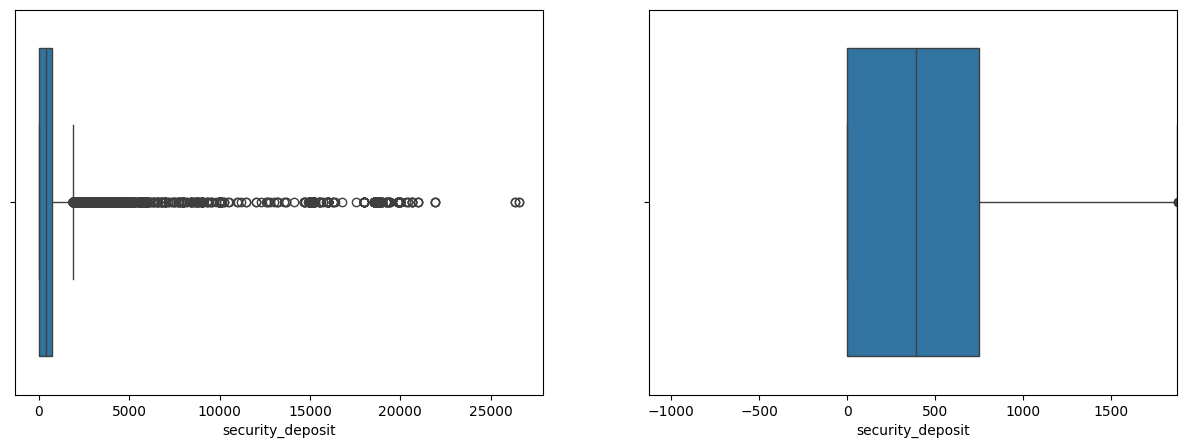

In [18]:
box_plot(base_airbnb['security_deposit'])

### host_listings_count

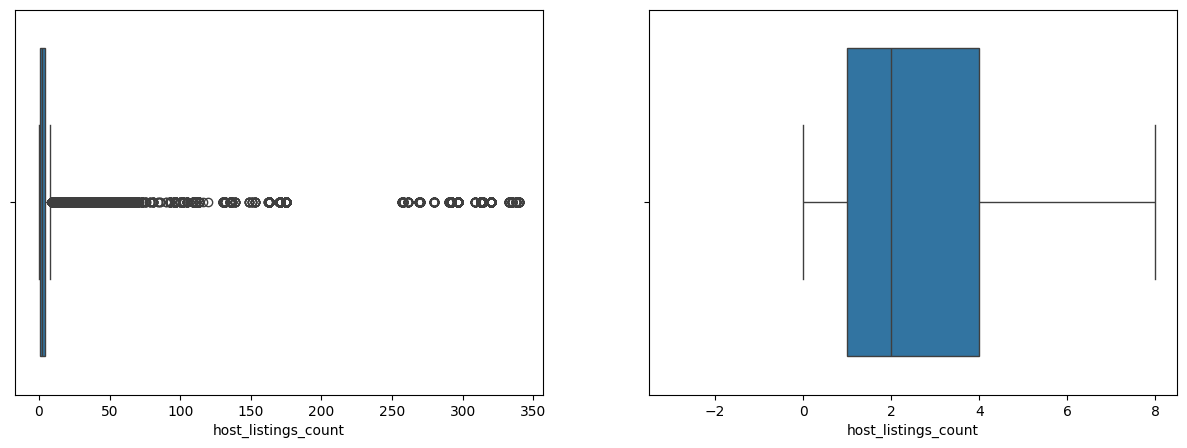

In [19]:
box_plot(base_airbnb['host_listings_count'])

In [20]:
base_airbnb, linhas_removidas = excluir_outilers(base_airbnb, 'host_listings_count')
print(f'{linhas_removidas} linhas foram removidas')

19411 linhas foram removidas


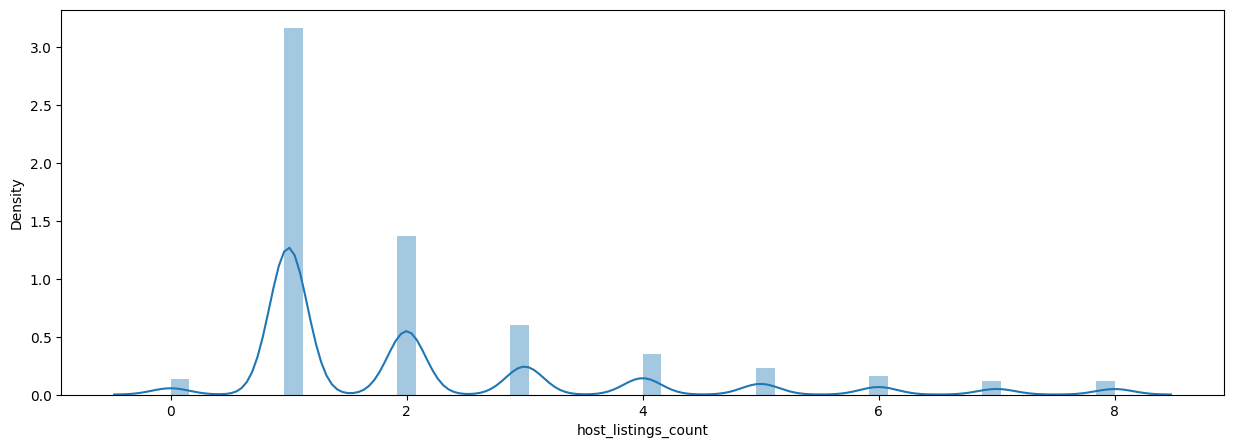

In [21]:
hist_plot(base_airbnb['host_listings_count'])

### accommodates

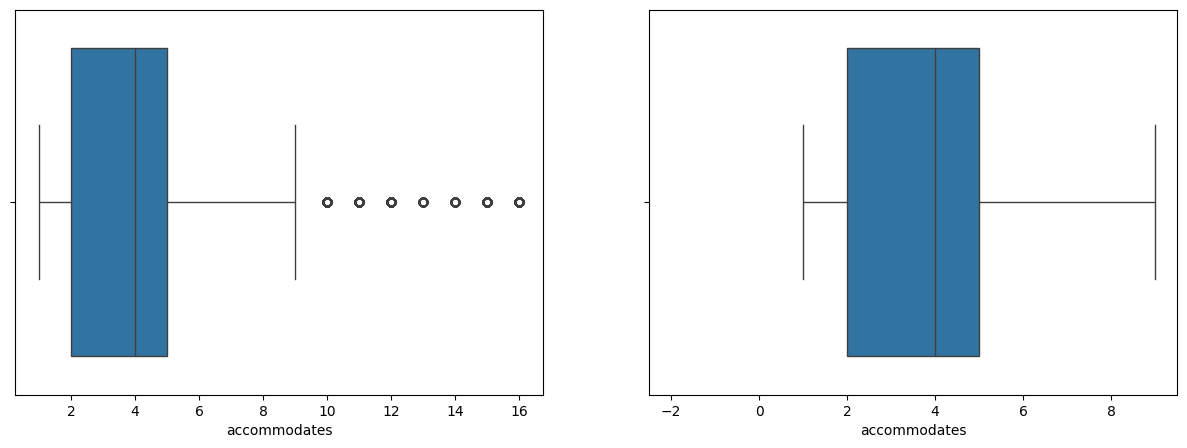

In [22]:
box_plot(base_airbnb['accommodates'])

In [23]:
base_airbnb, linhas_removidas = excluir_outilers(base_airbnb, 'accommodates')
print(f'{linhas_removidas} linhas foram removidas')

2529 linhas foram removidas


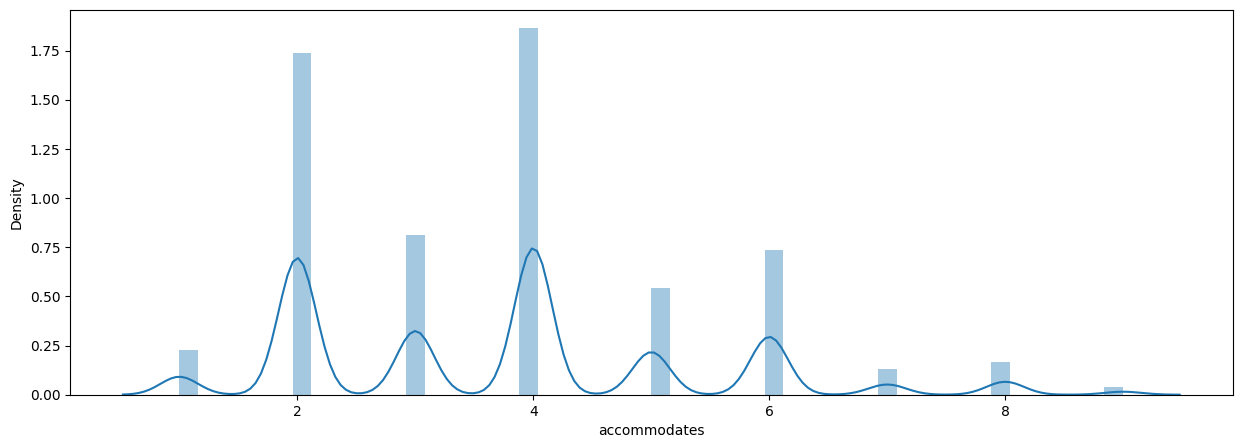

In [24]:
hist_plot(base_airbnb['accommodates'])

### bathrooms

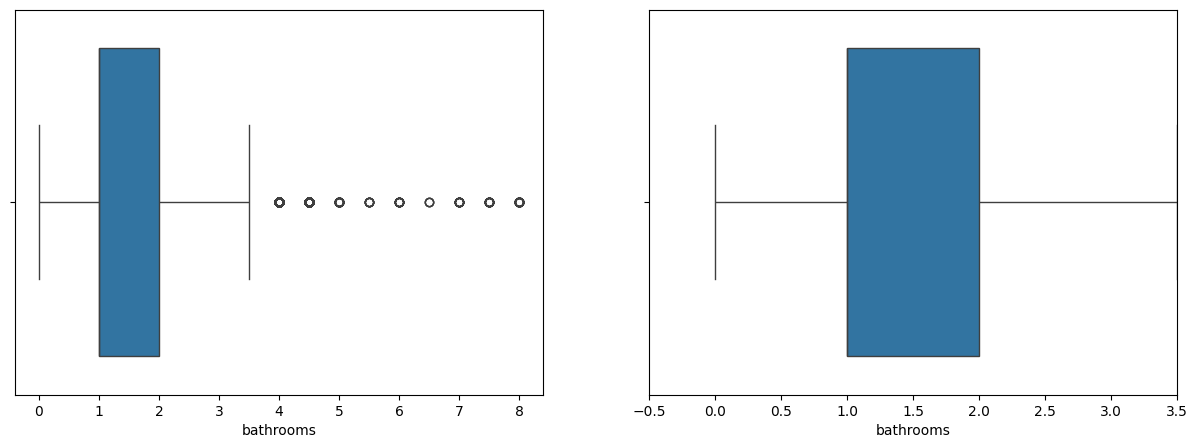

In [25]:
box_plot(base_airbnb['bathrooms'])

In [26]:
base_airbnb, linhas_removidas = excluir_outilers(base_airbnb, 'bathrooms')
print(f'{linhas_removidas} linhas foram removidas')

853 linhas foram removidas


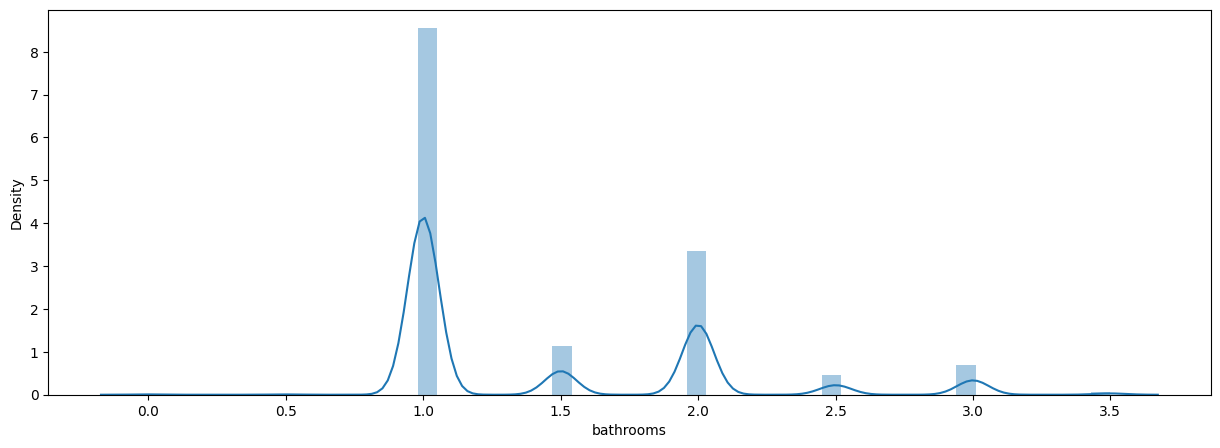

In [27]:
hist_plot(base_airbnb['bathrooms'])

### bedrooms

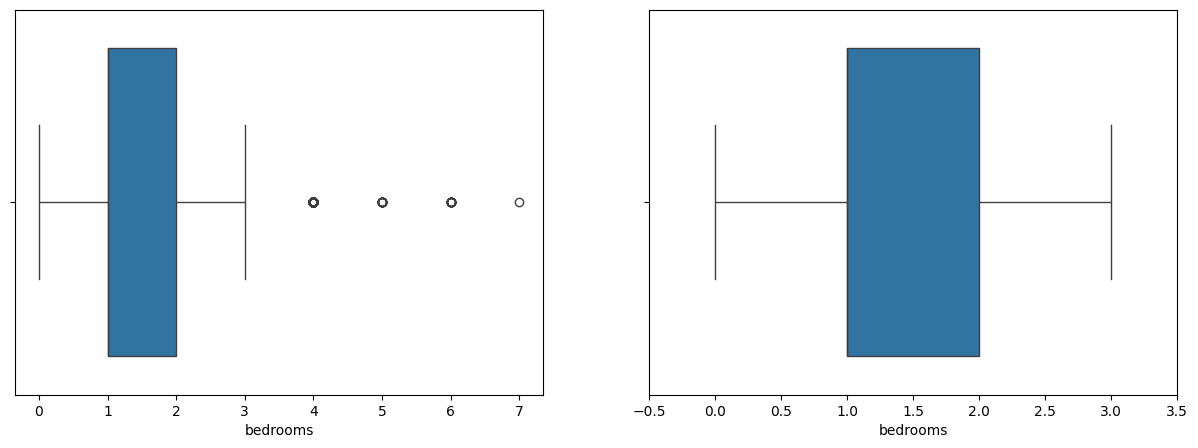

In [28]:
box_plot(base_airbnb['bedrooms'])

In [29]:
base_airbnb, linhas_removidas = excluir_outilers(base_airbnb, 'bedrooms')
print(f'{linhas_removidas} linhas foram removidas')

781 linhas foram removidas


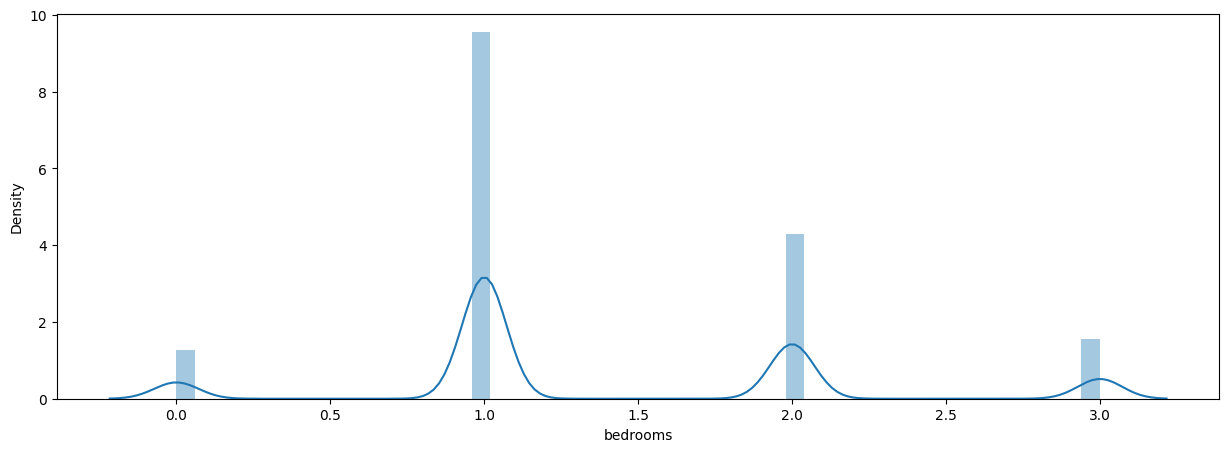

In [30]:
hist_plot(base_airbnb['bedrooms'])

### beds

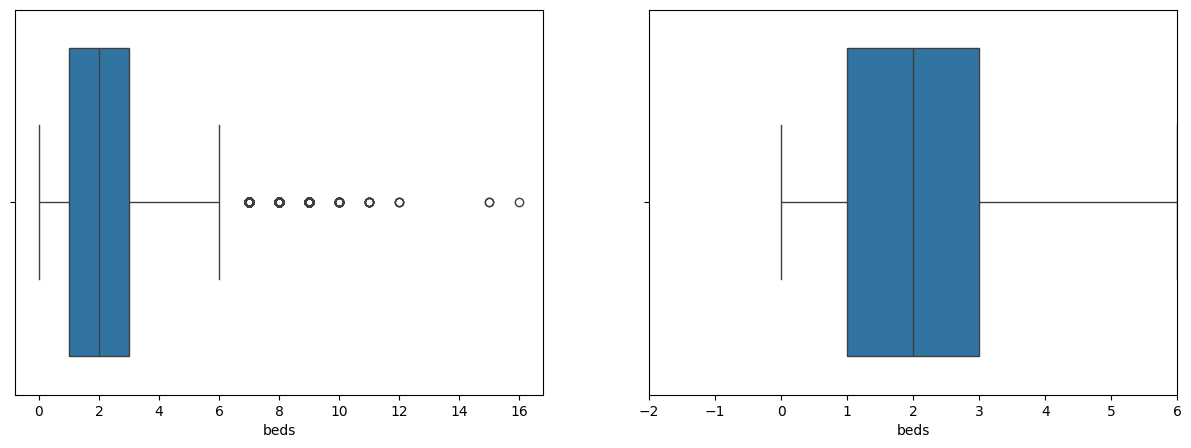

In [31]:
box_plot(base_airbnb['beds'])

In [32]:
base_airbnb, linhas_removidas = excluir_outilers(base_airbnb, 'beds')
print(f'{linhas_removidas} linhas foram removidas')

1542 linhas foram removidas


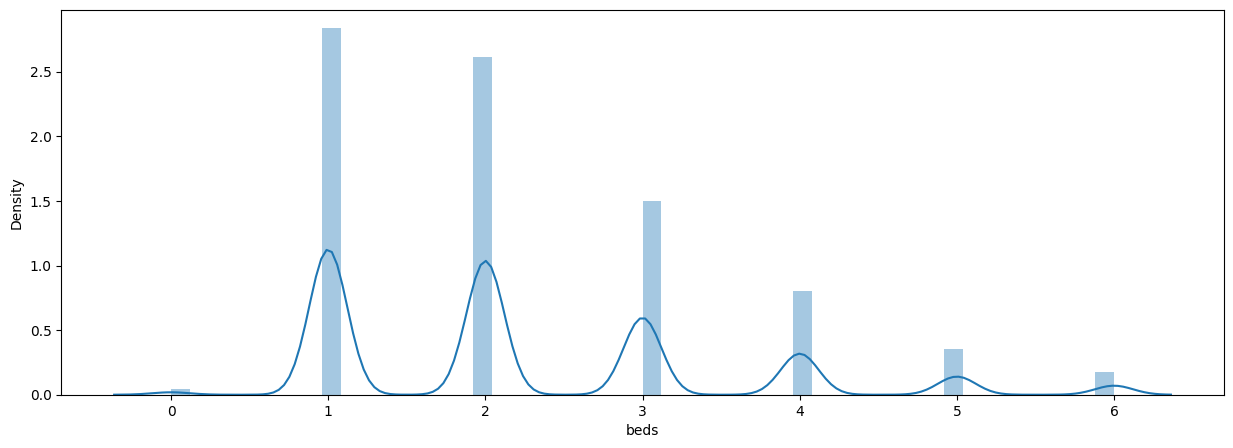

In [33]:
hist_plot(base_airbnb['beds'])

### minimum_nights

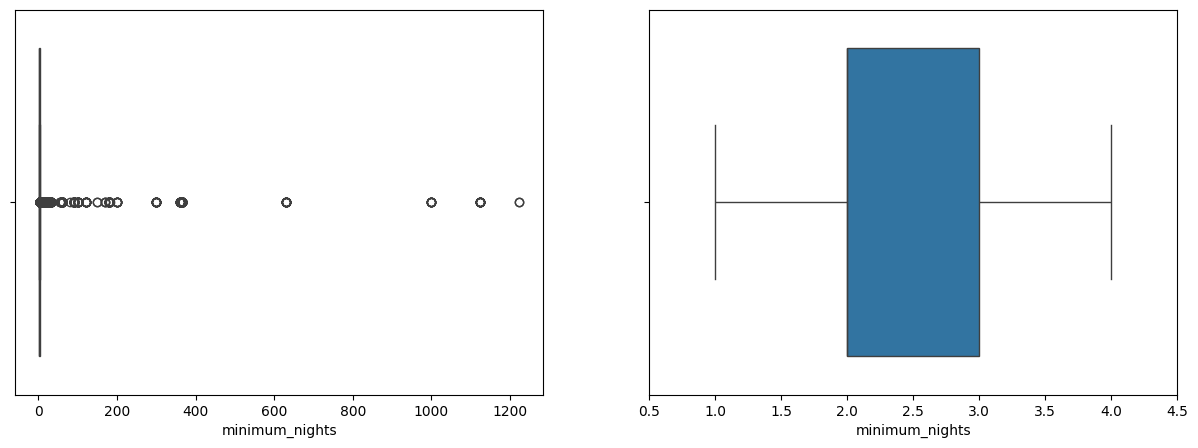

In [34]:
box_plot(base_airbnb['minimum_nights'])

In [35]:
base_airbnb, linhas_removidas = excluir_outilers(base_airbnb, 'minimum_nights')
print(f'{linhas_removidas} linhas foram removidas')

14544 linhas foram removidas


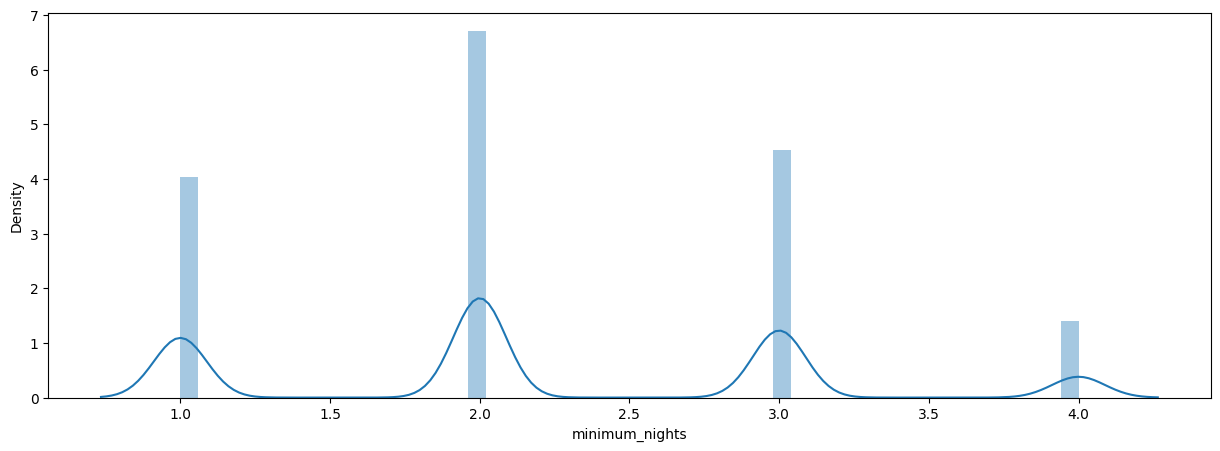

In [36]:
hist_plot(base_airbnb['minimum_nights'])

# Tratando colunas do tipo str

### property_type

property_type
Apartment             88890
Condominium            5895
House                  5705
Outros                 3379
Serviced apartment     3370
Loft                   3318
Name: count, dtype: int64


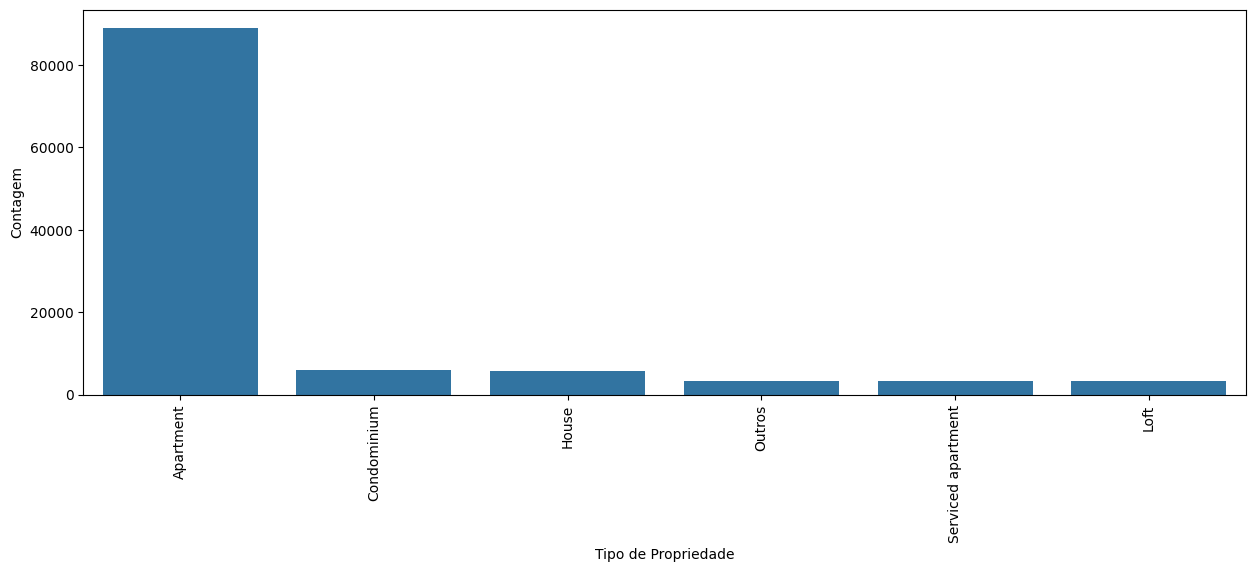

In [37]:
property_counts = base_airbnb['property_type'].value_counts()

# Identificar os tipos de propriedade com contagem menor que 2000
types_to_replace = property_counts[property_counts < 2000].index

# Substituir os tipos de propriedade com contagem menor que 2000 por "Outros"
base_airbnb['property_type'] = base_airbnb['property_type'].replace(types_to_replace, 'Outros')

property_counts = base_airbnb['property_type'].value_counts()
print(property_counts)

plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='property_type', data=base_airbnb, order=property_counts.index)
grafico.tick_params(axis='x', rotation=90)
plt.xlabel('Tipo de Propriedade')
plt.ylabel('Contagem')
plt.show()

### bed_type

bed_type
Real Bed    108760
Outros        1797
Name: count, dtype: int64


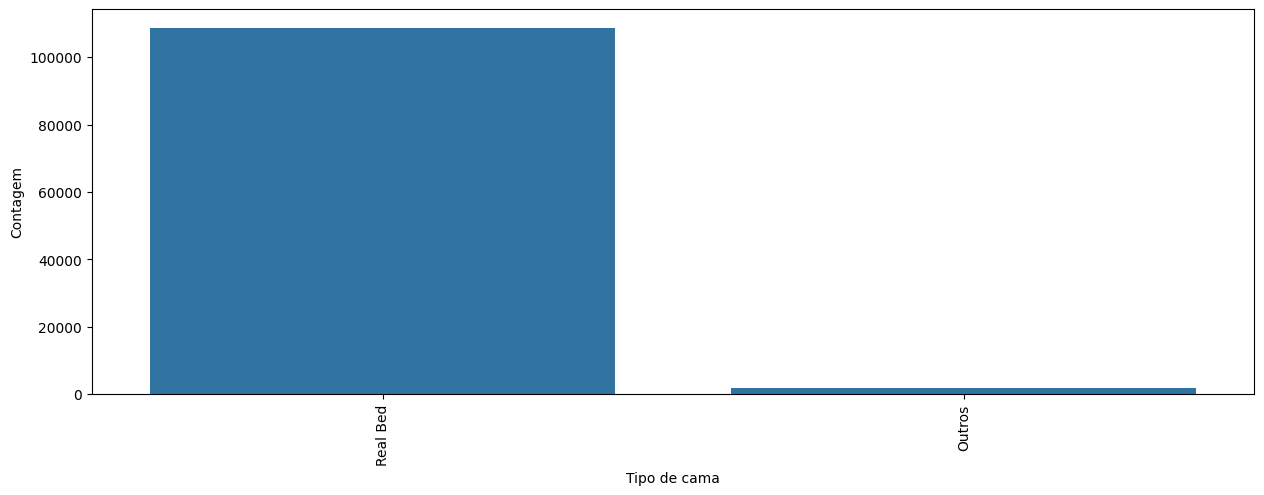

In [38]:
property_counts = base_airbnb['bed_type'].value_counts()

types_to_replace = property_counts[property_counts < 10000].index

base_airbnb['bed_type'] = base_airbnb['bed_type'].replace(types_to_replace, 'Outros')

property_counts = base_airbnb['bed_type'].value_counts()
print(property_counts)

plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='bed_type', data=base_airbnb, order=property_counts.index)
grafico.tick_params(axis='x', rotation=90)
plt.xlabel('Tipo de cama')
plt.ylabel('Contagem')
plt.show()

### cancellation_policy

cancellation_policy
strict_14_with_grace_period    54047
moderate                       29769
flexible                       22732
strict                          4009
Name: count, dtype: int64


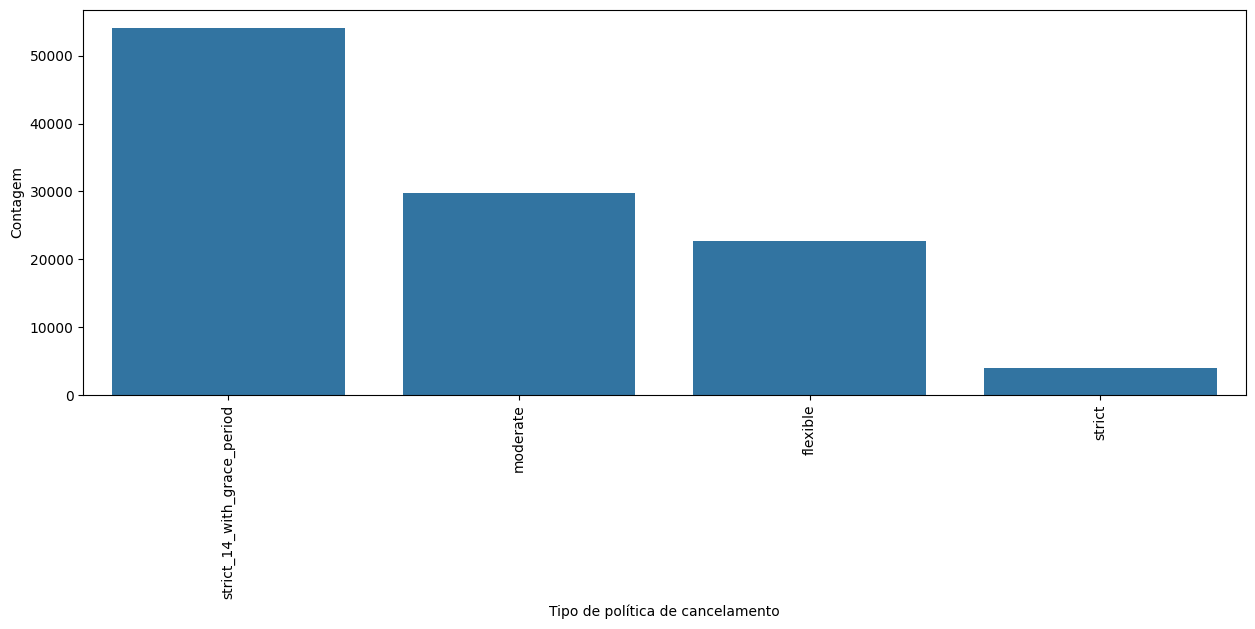

In [39]:
property_counts = base_airbnb['cancellation_policy'].value_counts()

types_to_replace = property_counts[property_counts < 10000].index

base_airbnb['cancellation_policy'] = base_airbnb['cancellation_policy'].replace(types_to_replace, 'strict')

property_counts = base_airbnb['cancellation_policy'].value_counts()
print(property_counts)

plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='cancellation_policy', data=base_airbnb, order=property_counts.index)
grafico.tick_params(axis='x', rotation=90)
plt.xlabel('Tipo de política de cancelamento')
plt.ylabel('Contagem')
plt.show()

### amenities

In [40]:
print(base_airbnb['amenities'].iloc[1].split(','))
print(len(base_airbnb['amenities'].iloc[1].split(',')))

base_airbnb['amenities'] = base_airbnb['amenities'].str.split(',').apply(len)

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', 'Doorman', 'Elevator', '"Buzzer/wireless intercom"', '"Family/kid friendly"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"}']
14


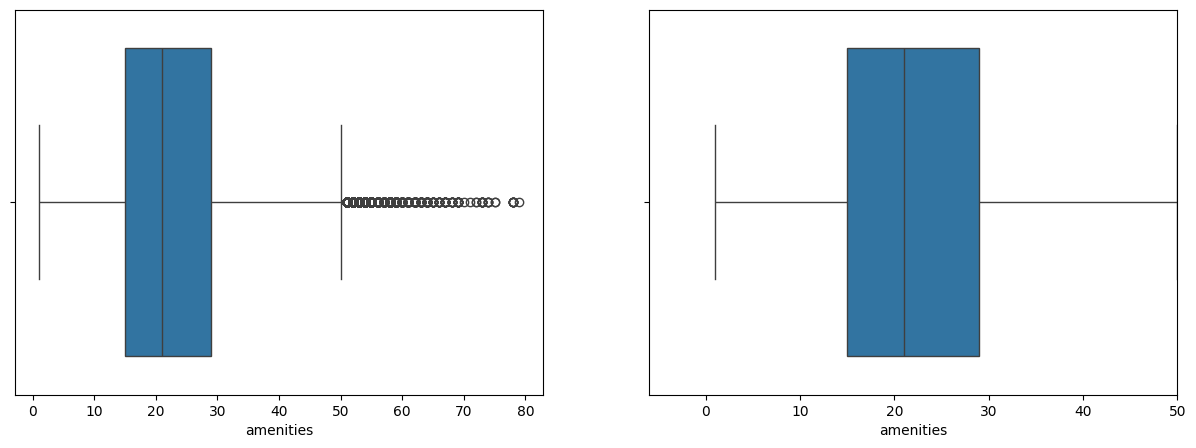

In [41]:
box_plot(base_airbnb['amenities'])

In [42]:
base_airbnb, linhas_removidas = excluir_outilers(base_airbnb, 'amenities')
print(f'{linhas_removidas} linhas foram removidas')

1795 linhas foram removidas


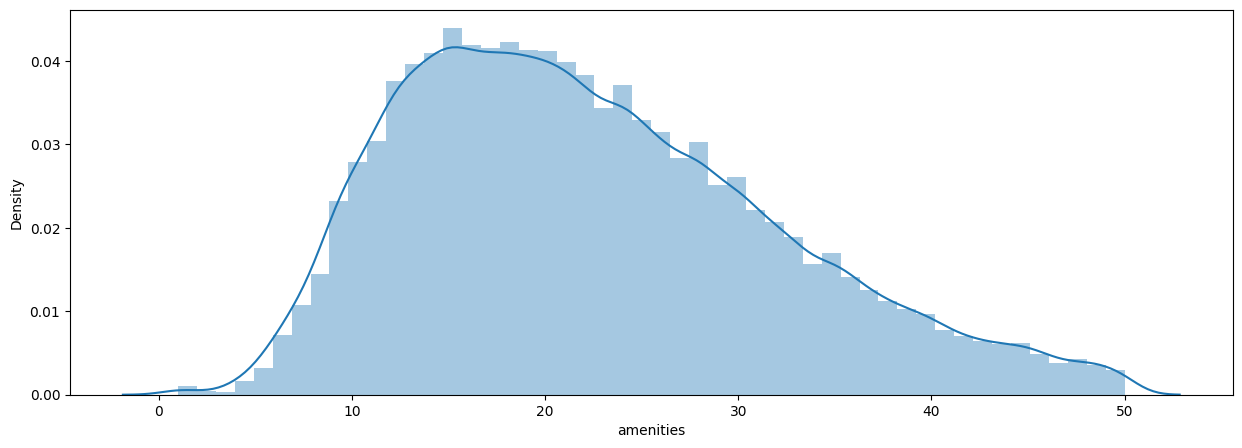

In [43]:
hist_plot(base_airbnb['amenities'])

# Enconding

Como os modelos de machine learning só aceitam valores numéricos, precisamos converter as colunas categóricas em numéricas usando a codificação one-hot. Isso transforma cada categoria em uma coluna binária (0 ou 1), tornando os dados compatíveis com o modelo.

In [44]:
# Atribuindo valores binários para representar "sim" (1) e "não" (0)
base_airbnb['host_is_superhost'] = base_airbnb['host_is_superhost'].map({'t': 1, 'f': 0})
base_airbnb['instant_bookable'] = base_airbnb['instant_bookable'].map({'t': 1, 'f': 0})
base_airbnb['is_business_travel_ready'] = base_airbnb['is_business_travel_ready'].map({'t': 1, 'f': 0})

base_airbnb = pd.get_dummies(base_airbnb, columns=['property_type', 'room_type', 'bed_type', 'cancellation_policy'])
display(base_airbnb.head())

,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,amenities,latitude,longitude,price,security_deposit,cleaning_fee,extra_people,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,ano,mes,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Loft,property_type_Outros,property_type_Serviced apartment,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Outros,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period
1,1,2.0,5,1.0,2.0,2.0,25,-22.965919,-43.178962,270.0,0.0,273.0,51.0,4,93.0,10.0,9.0,10.0,10.0,9.0,9.0,1,0,2018,4,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False
3,0,3.0,3,1.0,1.0,2.0,14,-22.977117,-43.190454,161.0,1000.0,220.0,45.0,4,94.0,9.0,10.0,10.0,10.0,10.0,9.0,0,0,2018,4,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
5,1,1.0,3,1.5,1.0,2.0,30,-22.988165,-43.193588,308.0,856.0,158.0,86.0,2,94.0,10.0,9.0,10.0,10.0,10.0,9.0,0,0,2018,4,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
6,1,1.0,2,1.0,1.0,2.0,30,-22.981269,-43.190457,219.0,400.0,140.0,80.0,3,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,2018,4,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
8,0,3.0,3,1.0,0.0,2.0,14,-22.921990,-43.183836,120.0,2049.0,512.0,0.0,3,80.0,6.0,4.0,8.0,6.0,6.0,4.0,0,0,2018,4,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False


# Modelo de previsão

In [127]:
# Dividindo dados em conjuntos de treino e teste
X = base_airbnb.drop('price', axis=1)  
y = base_airbnb['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Normalizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'ExtraTrees': ExtraTreesRegressor()
}

In [128]:
# Variáveis para rastrear o melhor modelo
best_model_name = None
best_model = None
best_r2 = -np.inf

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred) * 100 
    
    print(f"Model: {name}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R2: {r2:.2f}%")
    print("--------------")
    
    # Verificando se é o melhor modelo
    if r2 > best_r2:
        best_r2 = r2
        best_model_name = name
        best_model = model

Model: Linear Regression
MAE: 78.6171
MSE: 11388.8871
R2: 39.14%
--------------
Model: Decision Tree
MAE: 13.8766
MSE: 2185.2520
R2: 88.32%
--------------
Model: Random Forest
MAE: 14.9074
MSE: 1117.4331
R2: 94.03%
--------------
Model: ExtraTrees
MAE: 11.9428
MSE: 995.6825
R2: 94.68%
--------------


### Modelo com melhor desempenho: Random Forest

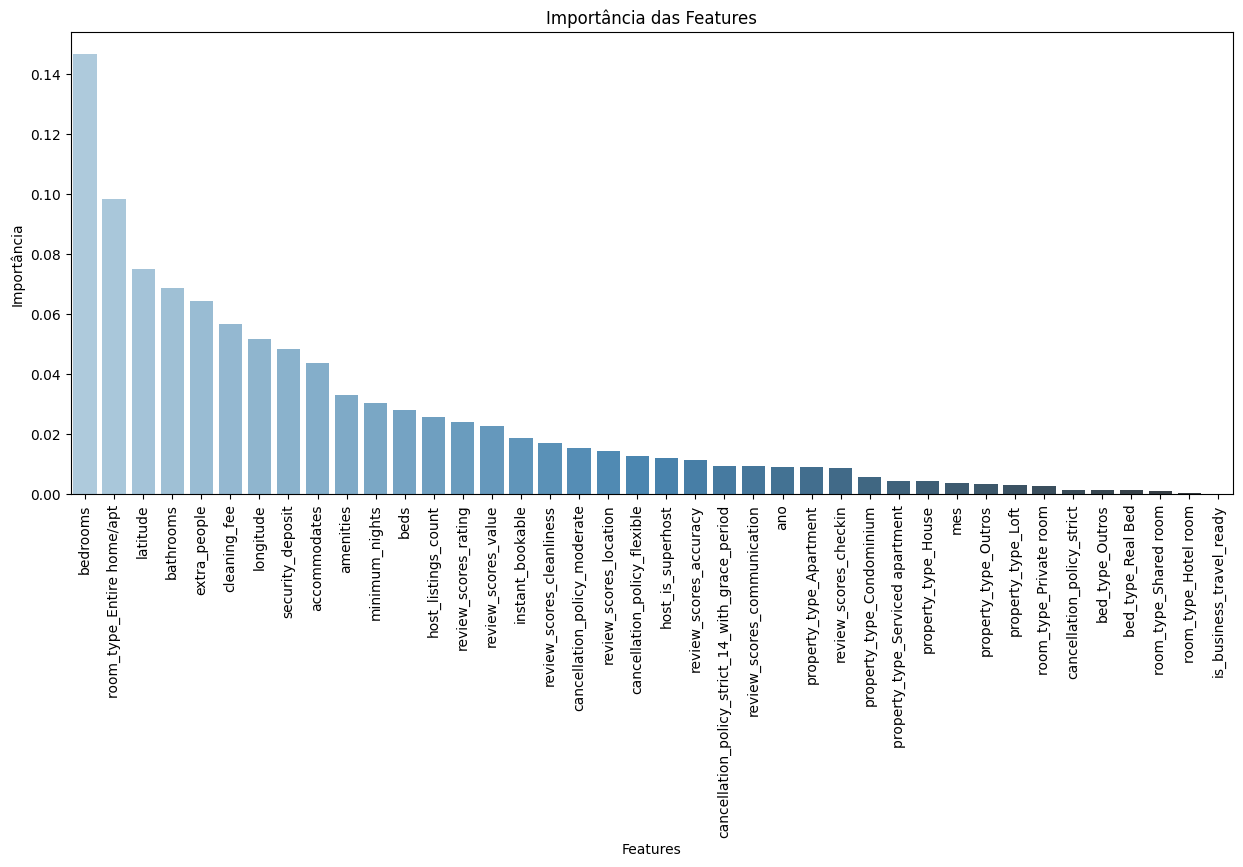

In [129]:
if best_model and hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_

    importance_features = pd.DataFrame(importances, index=X.columns, columns=['Importance'])
    importance_features = importance_features.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(15, 6))  
    sns.barplot(x=importance_features.index, y=importance_features['Importance'], palette='Blues_d')

    plt.xlabel('Features')
    plt.ylabel('Importância')
    plt.title('Importância das Features')

    plt.xticks(rotation=90)
    
    plt.show()